# 탐색적 데이터 분석

## 데이터 둘러보기

In [1]:
import pandas as pd

data_path = '../../data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path+'/train.csv', index_col = 'id')
test = pd.read_csv(data_path+'/test.csv', index_col = 'id')
submission = pd.read_csv(data_path+'/sample_submission.csv', index_col = 'id')

In [2]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [3]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [5]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

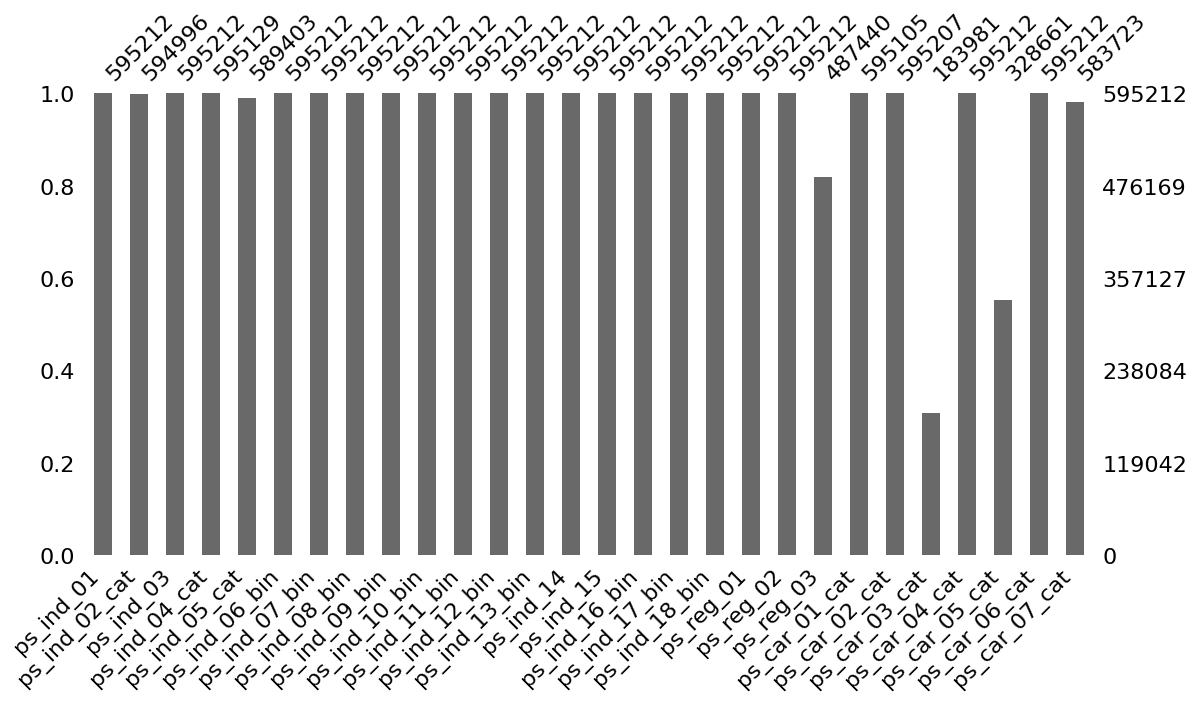

In [10]:
import numpy as np
import missingno as msno

train_copy = train.copy().replace(-1, np.nan)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

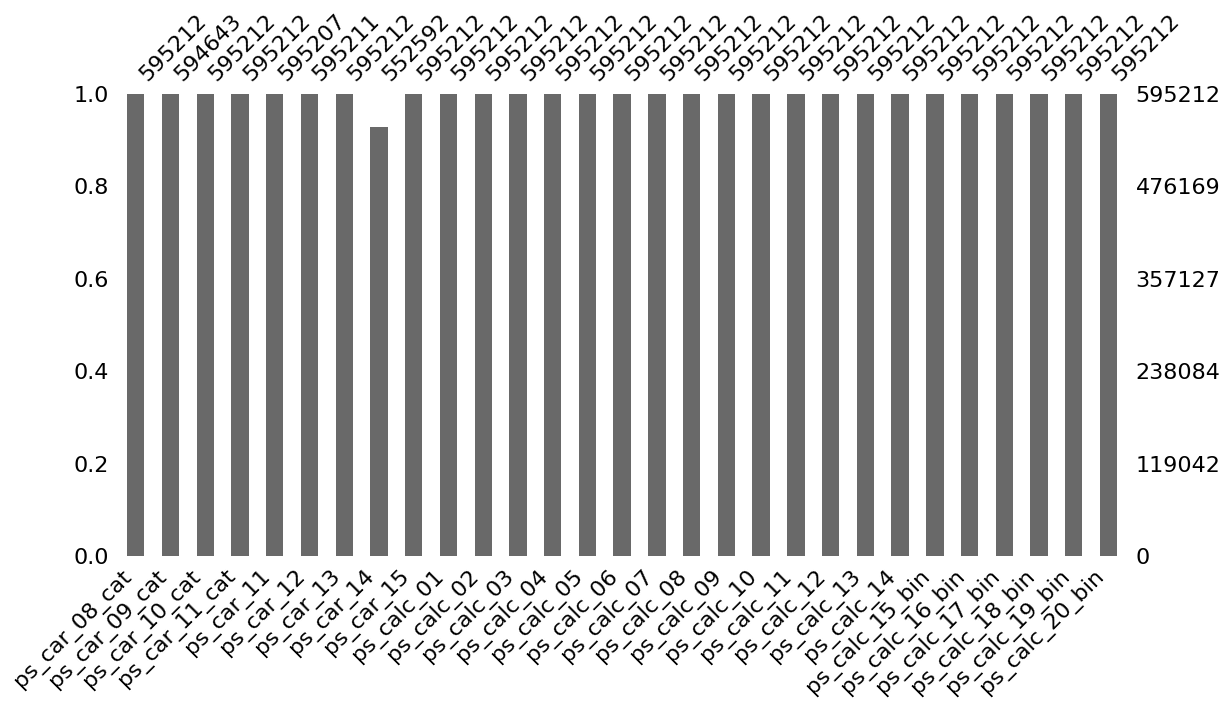

In [11]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6));

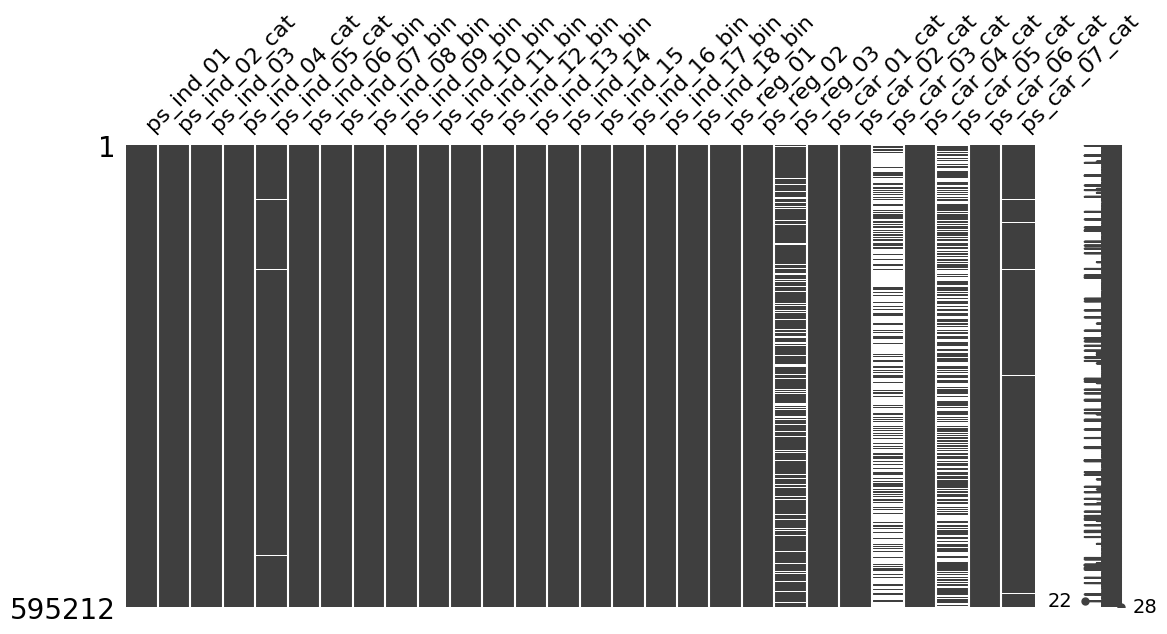

In [13]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

In [18]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df ==-1).sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if ('bin' in col) or (col == 'target'):
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'            
    return summary

In [19]:
summary = resumetable(train)
summary

데이터셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [20]:
summary[summary['데이터 종류']=='명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [21]:
summary[summary['데이터 타입']=='float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

## 데이터 시각화

In [22]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### 타깃값 분포

In [27]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_ooord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_ooord + width/2.0, height + total_size*0.001, '{:1.1f}%'.format(percent), ha='center')

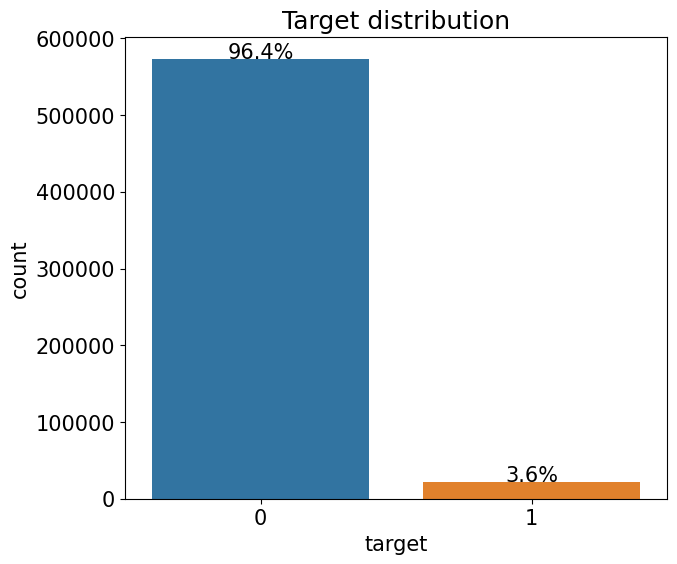

In [28]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target distribution');

### 이진 피처

In [30]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
    plt.tight_layout()

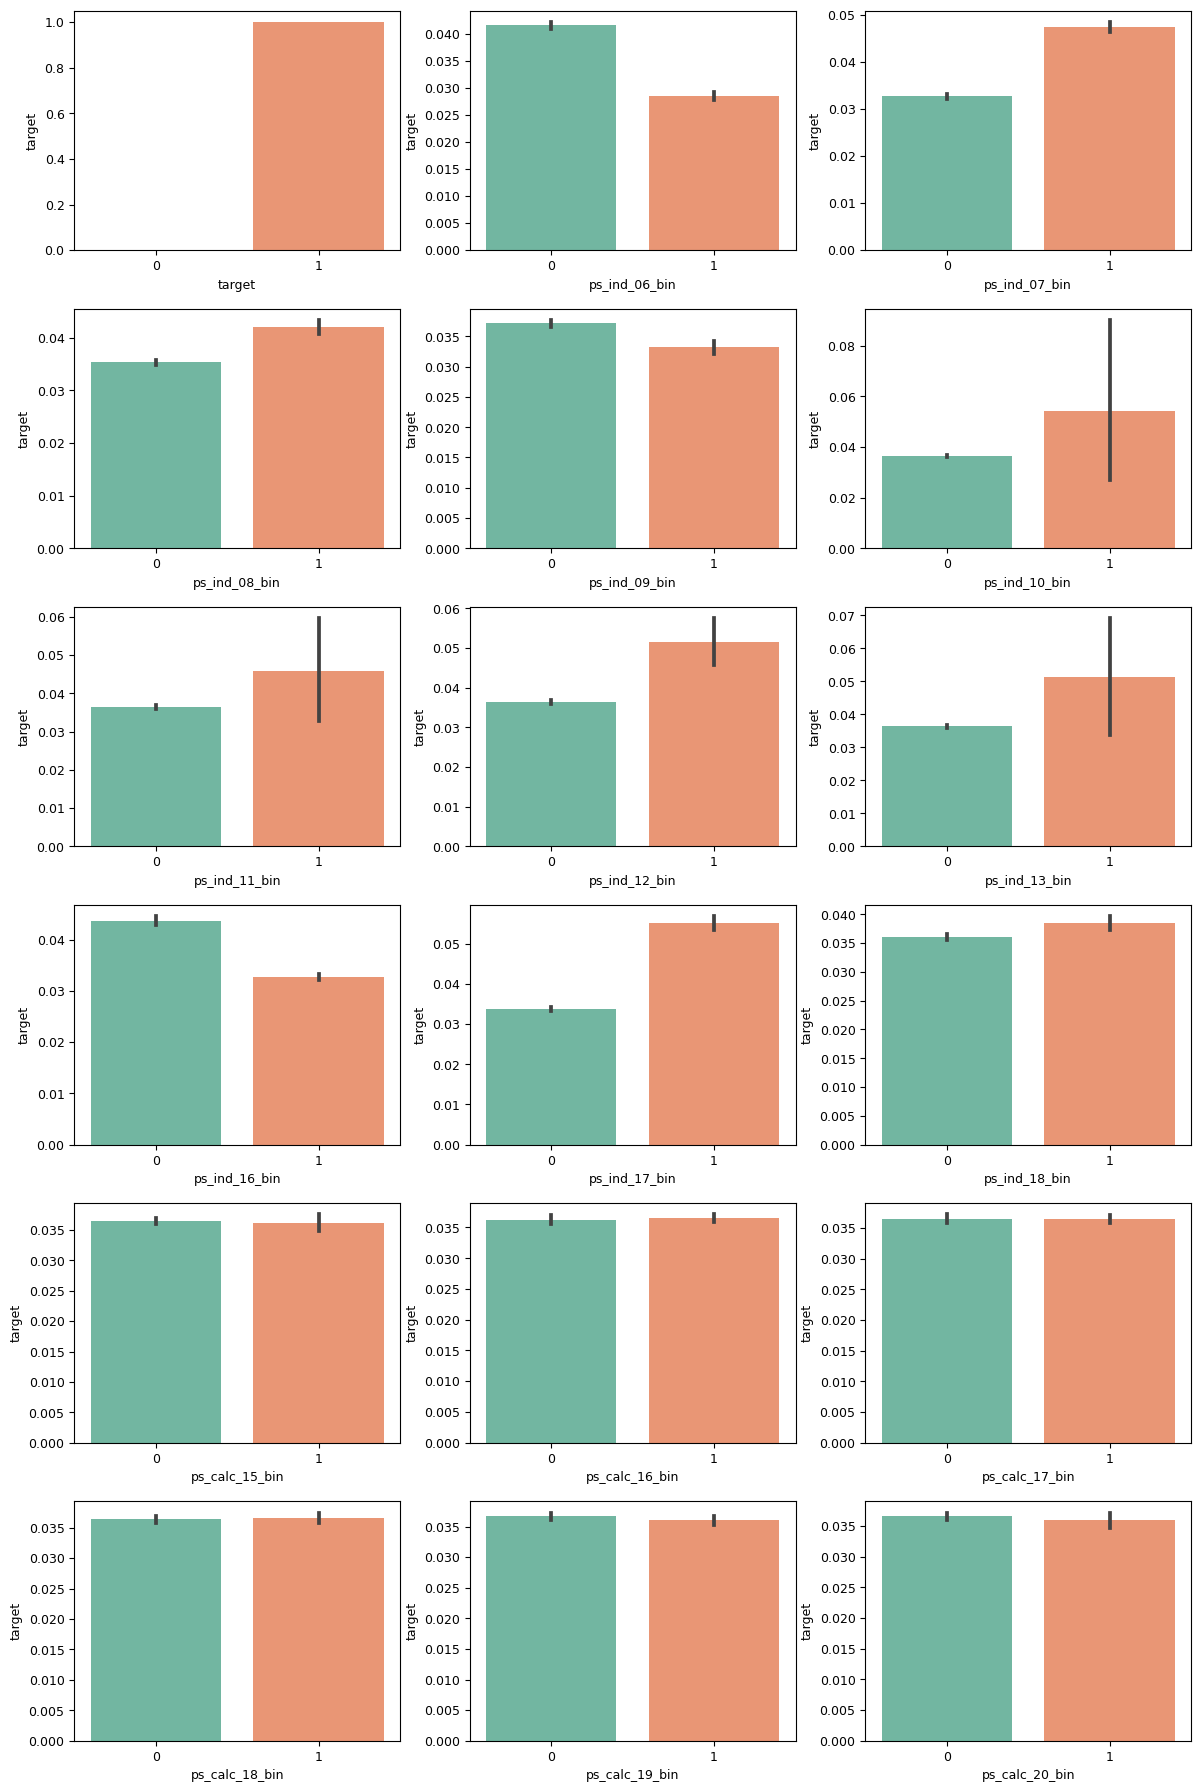

In [31]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

### 명목형 피처

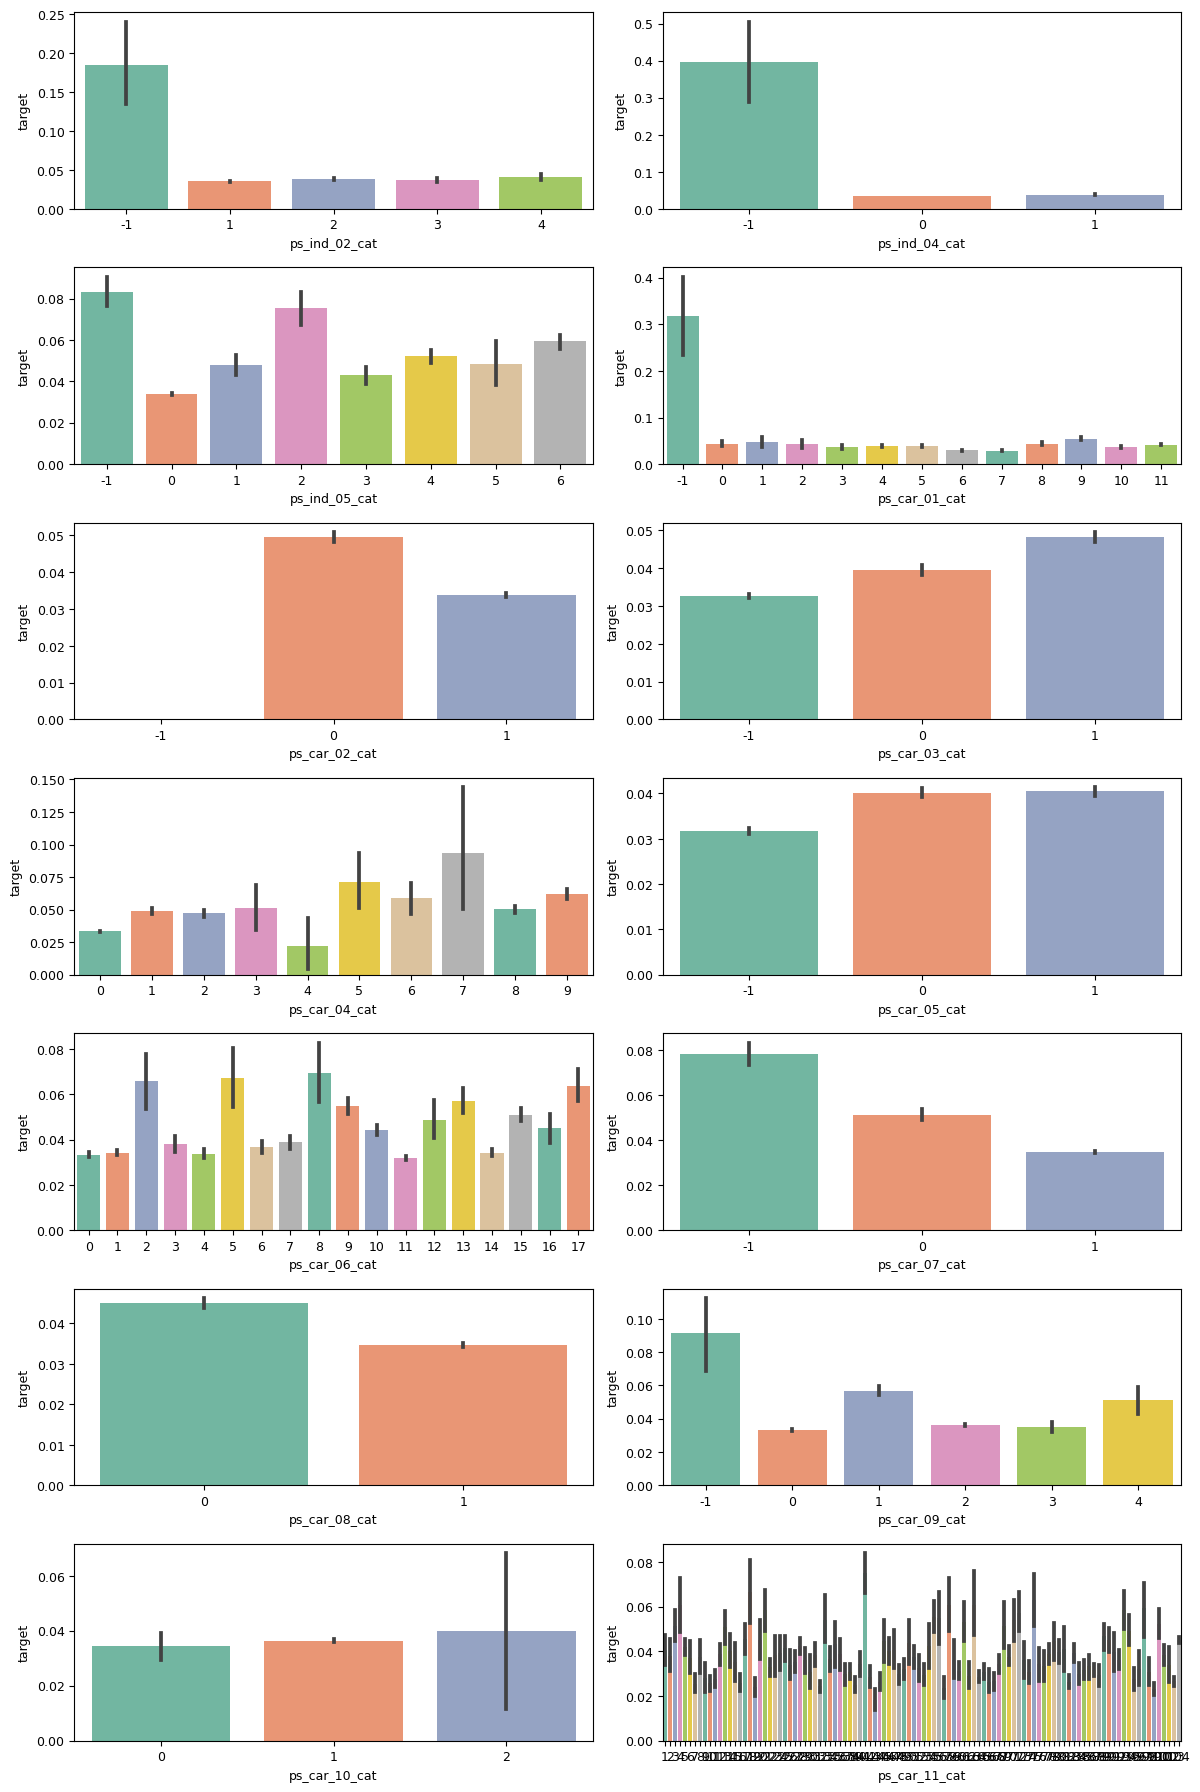

In [32]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index

plot_target_ratio_by_features(train, nom_features, 7, 2);a

### 순서형 피처

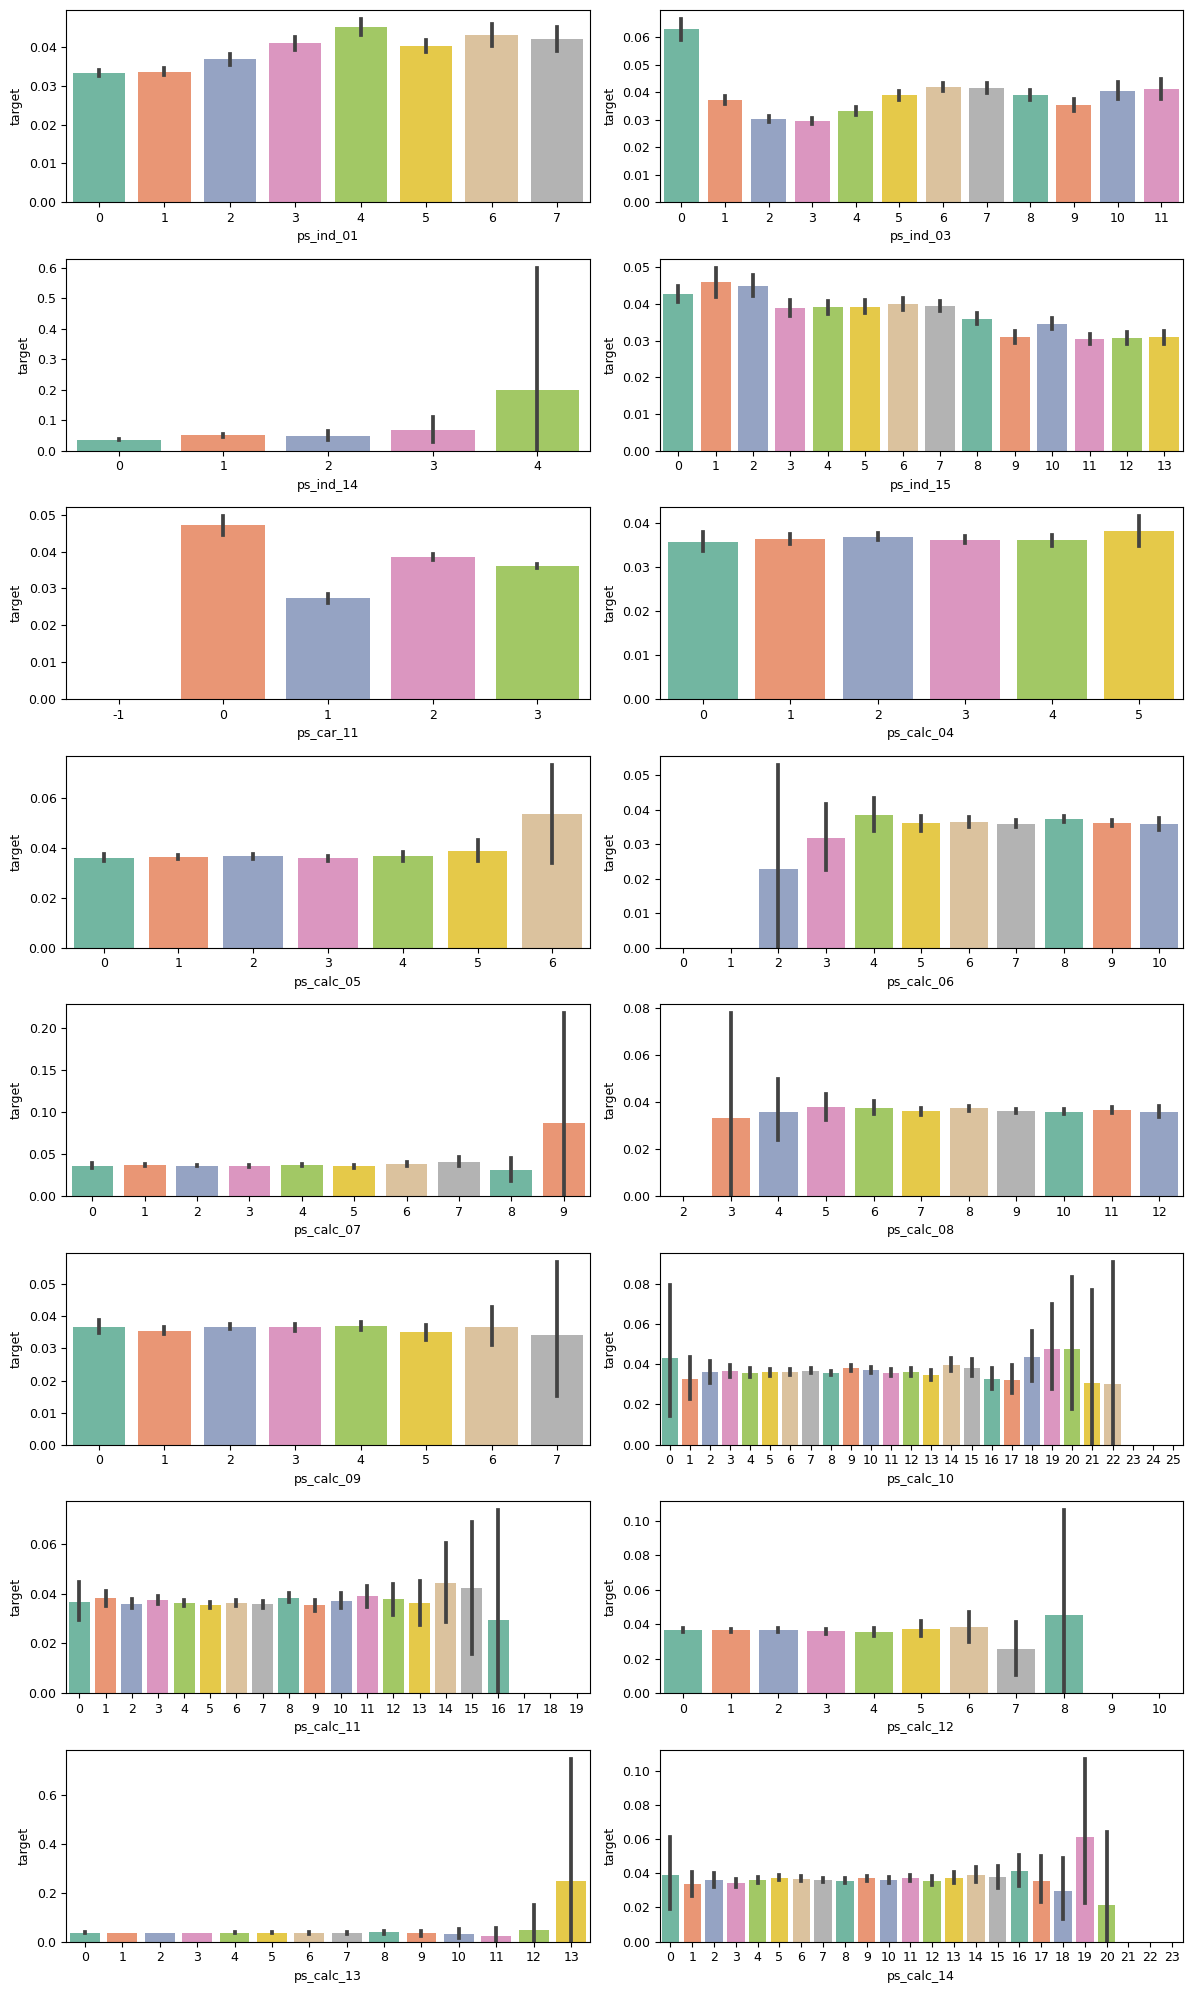

In [33]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

### 연속형 피처

In [34]:
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

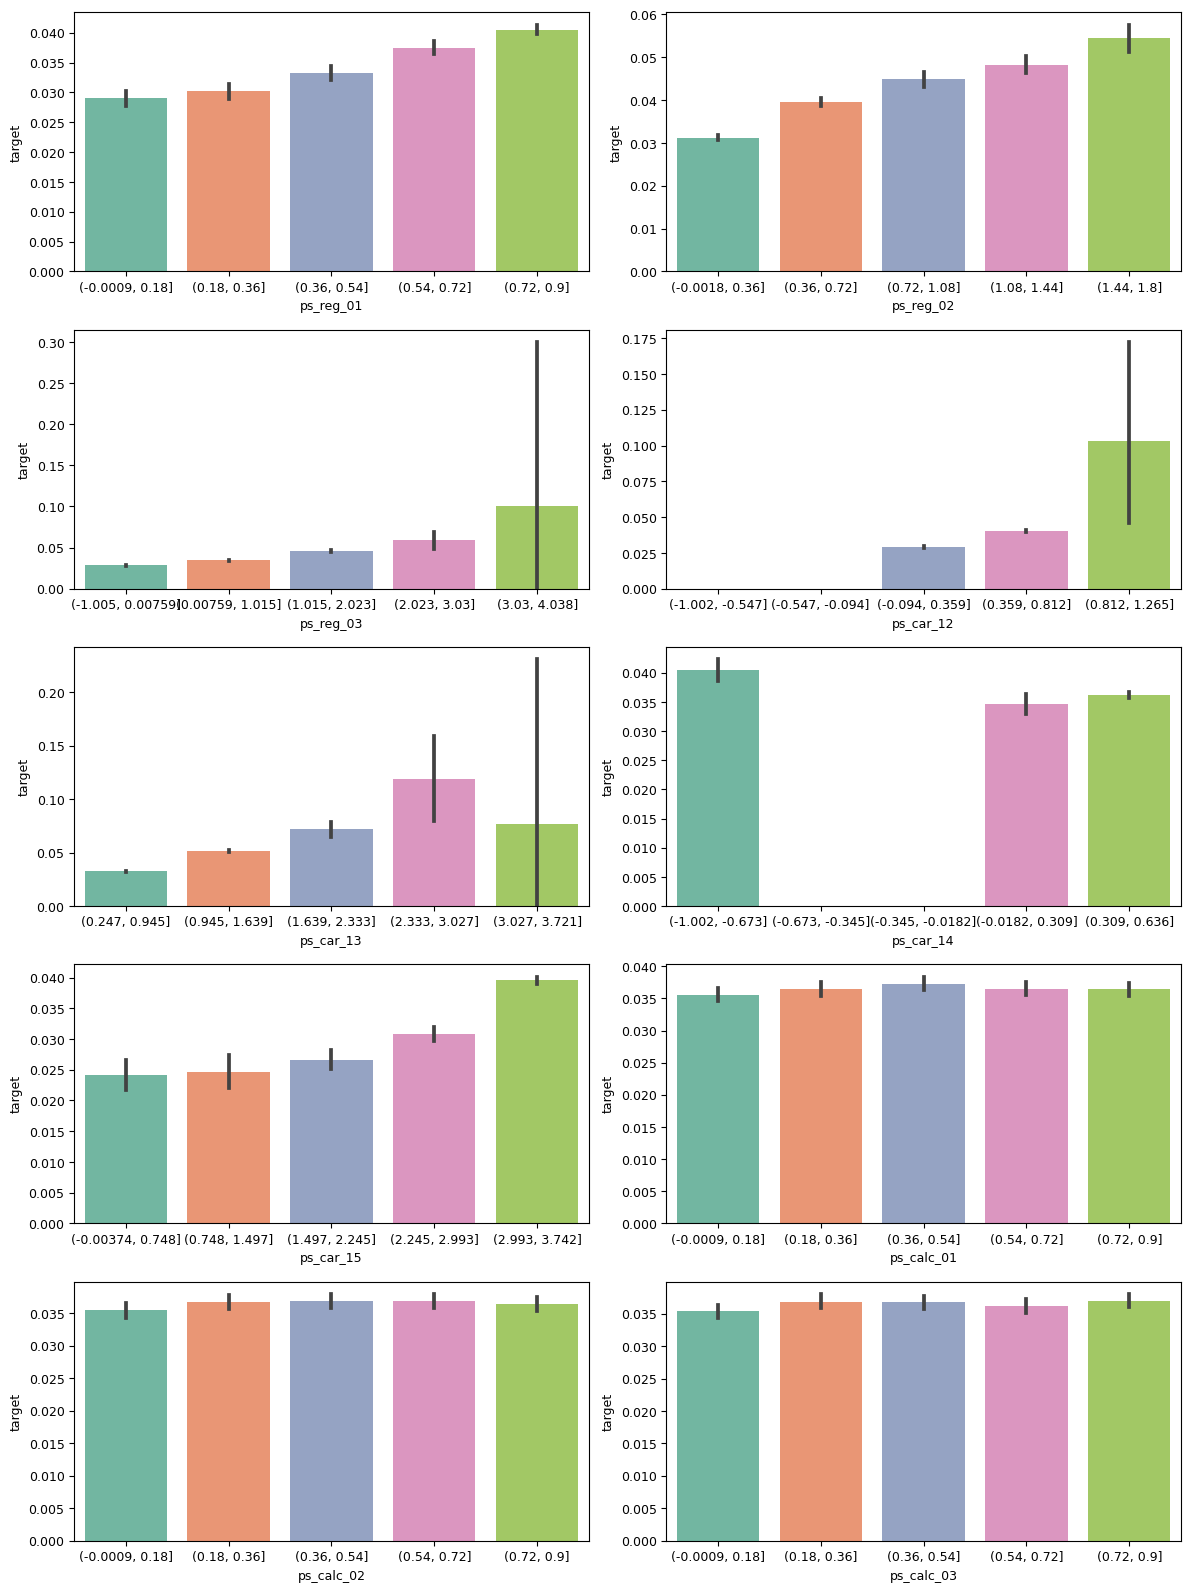

In [35]:
cont_features = summary[summary['데이터 종류']=='연속형'].index

for idx, feature in enumerate(cont_features):
    train[feature] = pd.cut(train[feature], 5)
    
plot_target_ratio_by_features(train, cont_features, 5, 2, (12, 16))    

### 연속형 피처 2

In [36]:
train_copy = train_copy.dropna()

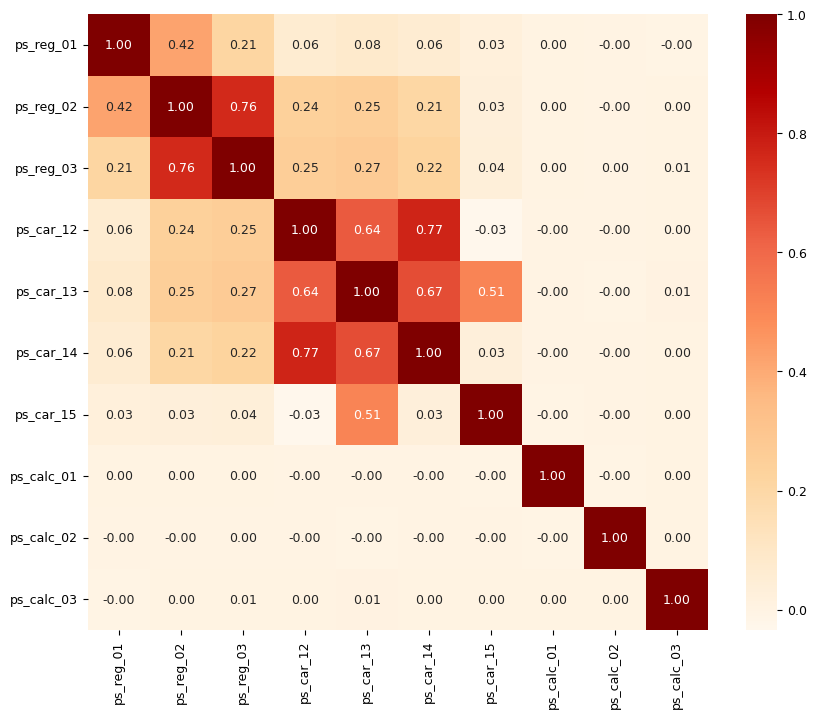

In [39]:
plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd', fmt='.2f');

### 분석 정리 및 모델링 전략
#### 분석 정리
- 결측값 처리 : 타겟 예측력이 있다면 고윳값으로
- 결측값 처리 : 피처간 상관관계 분석은 결측값 제거 후
- 피처 제거 : 신뢰구간이 넓으면 통계적 유효성이 떨어져 믿을 수 없음
- 피처 제거 : 고윳값 별 타깃값 비율에 차이가 없다면 타깃값 예측력이 없음
- 피처 제거 : 연속형 데이터가 구간별 타깃값 차이가 거의 앖다면 예측력이 없음
- 피처 제거 : 강한 상관관계의 두 피쳐는 하나를 제거

#### 모델링 전략
- 베이스라인 : LightGBM
- 성능 개선 1 : lightGBM, 파생 피처 추가, 베이지안 최적화
- 성능 개선 2 : XGBoost 
- 성능 개선 3 : LightGBM + XGBoost 앙상블

# 베이스라인 모델

In [1]:
import pandas as pd

data_path = '../../data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path+'/train.csv', index_col = 'id')
test = pd.read_csv(data_path+'/test.csv', index_col = 'id')
submission = pd.read_csv(data_path+'/sample_submission.csv', index_col = 'id')

## 피처 엔지니어링
### 데이터 합치기

In [2]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [3]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

### 명목형 피처 원-핫 인코딩

In [4]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

### 필요 없는 피처 제거

In [5]:
drop_features = ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14','ps_car_14']

remaining_features = [feature for feature in all_features
                     if ('cat' not in feature and 
                        'calc' not in feature and 
                        feature not in drop_features)]

In [8]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                              encoded_cat_matrix], format='csr')

### 데이터 나누기

In [10]:
num_train = len(train)
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y=train['target'].values

## 평가지표 계산 함수 작성
### 정규화 지니계수 계산 함수

In [11]:
import numpy as np

def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0]
    L_mid = np.linspace(1 / n_samples, 1, n_samples)
    
    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    G_pred = np.sum(L_mid - L_pred)
    
    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true)
    
    return G_pred/G_true

In [12]:
def gini(preds, dtrain):
    labels =dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

## 모델 훈련 및 성능 검증
### OOF 방식으로 LightGBM 훈련

In [13]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [14]:
params = {
    'objective':'binary',
    'learning_rate':0.01,
    'force_row_wize':True,
    'random_state':0
}

In [15]:
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

In [20]:
import lightgbm as lgb

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 : {idx+1}/폴드 {folds.n_splits}', '#'*40)
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)    
    
    lgb_model = lgb.train(params=params,
                         train_set=dtrain,
                         num_boost_round=1000,
                         valid_sets=dvalid,
                         feval=gini,
                         early_stopping_rounds=100,
                         verbose_eval=100)
    
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}')

######################################## 폴드 : 1/폴드 5 ########################################
[LightGBM] [Warning] Unknown parameter: force_row_wize


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[5

In [21]:
print('OOF 검증 데이터 지니 계수:',eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니 계수: 0.2804995714877777


## 예측 및 결과 제출

In [22]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

# 성능 개선 1 : LightGBM

In [23]:
import pandas as pd

data_path = '../../data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path+'/train.csv', index_col = 'id')
test = pd.read_csv(data_path+'/test.csv', index_col = 'id')
submission = pd.read_csv(data_path+'/sample_submission.csv', index_col = 'id')

## 피처 엔지니어링
### 데이터 합치기

In [24]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

### 명목형 피처 원-핫 인코딩

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

### 파생 피처 추가

In [28]:
all_data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488023,0,1,6,0,0,0,1,0,0,0,...,4,2,3,4,0,1,0,0,1,0
1488024,5,3,5,1,0,0,0,1,0,0,...,6,2,2,11,0,0,1,1,0,0
1488025,0,1,5,0,0,1,0,0,0,0,...,5,2,2,11,0,1,1,0,0,0
1488026,6,1,5,1,0,0,0,0,1,0,...,1,1,2,7,1,1,0,0,0,0


In [30]:
(all_data==-1).sum(axis=1)

0          1
1          2
2          3
3          0
4          2
          ..
1488023    1
1488024    1
1488025    2
1488026    1
1488027    0
Length: 1488028, dtype: int64

In [31]:
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [32]:
remaining_features = [feature for feature in all_features 
                     if ('cat' not in feature and 'calc' not in feature)]
remaining_features.append('num_missing')

In [34]:
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True

for feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[feature].astype(str) + '_'

In [36]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [38]:
all_data['ps_ind_02_cat'].value_counts()

 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: ps_ind_02_cat, dtype: int64

In [39]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [40]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [41]:
all_data['ps_ind_02_cat_count']

0           309747
1          1079327
2            28259
3          1079327
4           309747
            ...   
1488023    1079327
1488024      70172
1488025    1079327
1488026    1079327
1488027    1079327
Name: ps_ind_02_cat_count, Length: 1488028, dtype: int64

In [42]:
all_data[cat_count_features]

,ps_ind_02_cat_count,ps_ind_04_cat_count,ps_ind_05_cat_count,ps_car_01_cat_count,ps_car_02_cat_count,ps_car_03_cat_count,ps_car_04_cat_count,ps_car_05_cat_count,ps_car_06_cat_count,ps_car_07_cat_count,ps_car_08_cat_count,ps_car_09_cat_count,ps_car_10_cat_count,ps_car_11_cat_count,mix_ind_count
0,309747,620936,1319412,124587,1234979,1028142,1241334,431560,77845,1383070,249663,486510,1475460,18326,6
1,1079327,866864,1319412,518725,1234979,1028142,1241334,666910,329890,1383070,1238365,883326,1475460,12535,36
2,28259,620936,1319412,449617,1234979,1028142,1241334,666910,147714,1383070,1238365,883326,1475460,19943,24
3,1079327,866864,1319412,449617,1234979,183044,1241334,431560,329890,1383070,1238365,36798,1475460,212989,2784
4,309747,620936,1319412,518725,1234979,1028142,1241334,666910,147714,1383070,1238365,883326,1475460,26161,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488023,1079327,866864,1319412,14844,1234979,1028142,51211,389558,147714,76138,1238365,486510,1475460,3066,107
1488024,70172,620936,1319412,37603,1234979,1028142,1241334,389558,83563,1383070,249663,486510,1475460,23506,26
1488025,1079327,866864,1319412,518725,1234979,1028142,1241334,666910,329890,1383070,249663,72947,1475460,9725,258
1488026,1079327,620936,1319412,124587,253039,1028142,1241334,431560,83563,1383070,1238365,486510,1475460,31344,37


### 필요 없는 피처 제거

In [44]:
from scipy import sparse

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining), encoded_cat_matrix], format='csr')

### 데이터 나누기

In [45]:
num_train = len(train)
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['target'].values

## 하이퍼파라미터 최적화

### 데이터셋 준비

In [49]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [50]:
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [52]:
param_bounds = {
    'num_leaves' : (30, 40),
    'lambda_l1':(0.7, 0.9),
    'lambda_l2':(0.9, 1),
    'feature_fraction' : (0.6, 0.7),
    'bagging_fraction' : (0.6, 0.9),
    'min_child_samples' : (6, 10),
    'min_child_weight' : (10, 40)
}

fixed_params = {
    'objective': 'binary',
    'learning_rate' : 0.005,
    'bagging_freq' : 1,
    'force_row_wise' : True,
    'random_state' : 1991
}

In [54]:
param_bounds.keys()

dict_keys(['num_leaves', 'lambda_l1', 'lambda_l2', 'feature_fraction', 'bagging_fraction', 'min_child_samples', 'min_child_weight'])

### (베이지안 최적화용) 평가지표 계산 함수 작성

In [55]:
def eval_function(num_leaves , lambda_l1 , lambda_l2 ,  feature_fraction ,
                  bagging_fraction , min_child_samples , min_child_weight):
    params = {
        'num_leaves':int(round(num_leaves)), 
        'lambda_l1': lambda_l1, 
        'lambda_l2':lambda_l2, 
        'feature_fraction':feature_fraction, 
        'bagging_fraction':bagging_fraction, 
        'min_child_samples':int(round(min_child_samples)), 
        'min_child_weight':min_child_weight,
        'feature_pre_filter': False}
    
    params.update(fixed_params)
    
    print('하이퍼 파라미터 : ', params)
    
    lgb_model = lgb.train(params = params,
                         train_set = bayes_dtrain,
                         num_boost_round = 2500,
                         valid_sets=bayes_dvalid,
                         feval = gini,
                         early_stopping_rounds=300,
                         verbose_eval=False)
    
    preds = lgb_model.predict(X_valid)
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}')
    return gini_score

### 최적화 수행

In [60]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,
                                pbounds=param_bounds,
                                random_state=0)

In [61]:
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼 파라미터 :  {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
지니계수 : 0.27145839245186776
| 1         | 0.2715    | 0.7646    | 0.6715    | 0.8206    | 0.9545    | 7.695     | 29.38     | 34.38     |
하이퍼 파라미터 :  {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


지니계수 : 0.2718217152601061
| 4         | 0.2718    | 0.6462    | 0.6245    | 0.8186    | 0.9612    | 6.93      | 24.68     | 34.82     |
하이퍼 파라미터 :  {'num_leaves': 32, 'lambda_l1': 0.7413334046451034, 'lambda_l2': 0.9567561750440571, 'feature_fraction': 0.6289363133181198, 'bagging_fraction': 0.6104628512758752, 'min_child_samples': 7, 'min_child_weight': 19.430156362884897, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


지니계수 : 0.2711166046765268
| 5         | 0.2711    | 0.6105    | 0.6289    | 0.7413    | 0.9568    | 6.513     | 19.43     | 32.1      |
하이퍼 파라미터 :  {'num_leaves': 35, 'lambda_l1': 0.7663863099025093, 'lambda_l2': 0.9765239328863365, 'feature_fraction': 0.687278306551802, 'bagging_fraction': 0.683776316158201, 'min_child_samples': 9, 'min_child_weight': 25.241720350830338, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
지니계수 : 0.2709270891537664
| 6         | 0.2709    | 0.6838    | 0.6873    | 0.7664    | 0.9765    | 8.595     | 25.24     | 35.26     |
하이퍼 파라미터 :  {'num_leaves': 36, 'lambda_l1': 0.862092450221885, 'lambda_l2': 0.900511488097541, 'feature_fraction': 0.6556247435580953, 'bagging_fraction': 0.7236613926476847, 'min_child_samples': 8, 'min_child_weight': 16.800997543304433, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
지니계수 : 0.2708348610253792
| 7         | 0.2708    | 0.7237    | 0.6556    | 0.8621    | 0.9005    | 8.223     | 16.8      | 36.38     |
하이퍼 파라미터 :  {'num_leaves': 32, 'lambda_l1': 0.829932662510154, 'lambda_l2': 0.9309382272206734, 'feature_fraction': 0.6952194054160209, 'bagging_fraction': 0.6675659367709144, 'min_child_samples': 8, 'min_child_weight': 28.604068940720285, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
지니계수 : 0.27171529386129656
| 8         | 0.2717    | 0.6676    | 0.6952    | 0.8299    | 0.9309    | 7.88      | 28.6      | 31.94     |
하이퍼 파라미터 :  {'num_leaves': 32, 'lambda_l1': 0.7859860005346364, 'lambda_l2': 0.9176267063505718, 'feature_fraction': 0.6773004854314049, 'bagging_fraction': 0.8788422592110651, 'min_child_samples': 8, 'min_child_weight': 28.786796671296322, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
지니계수 : 0.27147471149806973
| 9         | 0.2715    | 0.8788    | 0.6773    | 0.786     | 0.9176    | 7.969     | 28.79     | 31.92     |


### 결과 확인

In [62]:
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6462351508131959,
 'feature_fraction': 0.624499020990495,
 'lambda_l1': 0.8185892638872938,
 'lambda_l2': 0.9612425249096734,
 'min_child_samples': 6.930407509828337,
 'min_child_weight': 24.676764979328127,
 'num_leaves': 34.82061852767735}

In [63]:
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [64]:
max_params.update(fixed_params)

In [65]:
max_params

{'bagging_fraction': 0.6462351508131959,
 'feature_fraction': 0.624499020990495,
 'lambda_l1': 0.8185892638872938,
 'lambda_l2': 0.9612425249096734,
 'min_child_samples': 7,
 'min_child_weight': 24.676764979328127,
 'num_leaves': 35,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

## 모델 훈련 및 성능 검증

In [67]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params=max_params,
                         train_set=dtrain,
                         num_boost_round=2500,
                         valid_sets=dvalid,
                         feval=gini,
                         early_stopping_rounds=300,
                         verbose_eval=100)
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}')

######################################## 폴드 1 / 폴드 5 ########################################


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154287	valid_0's gini: 0.267626
[200]	valid_0's binary_logloss: 0.153221	valid_0's gini: 0.273886
[300]	valid_0's binary_logloss: 0.15263	valid_0's gini: 0.278512
[400]	valid_0's binary_logloss: 0.152267	valid_0's gini: 0.281994
[500]	valid_0's binary_logloss: 0.152022	valid_0's gini: 0.285446
[600]	valid_0's binary_logloss: 0.151864	valid_0's gini: 0.287771
[700]	valid_0's binary_logloss: 0.151747	valid_0's gini: 0.289774
[800]	valid_0's binary_logloss: 0.151657	valid_0's gini: 0.291463
[900]	valid_0's binary_logloss: 0.151589	valid_0's gini: 0.292923
[1000]	val

폴드 4 지니계수 : 0.2797854158121087
######################################## 폴드 5 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458815
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 476170, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274766
[LightGBM] [Info] Start training from score -3.274766
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154416	valid_0's gini: 0.265016
[200]	valid_0's binary_logloss: 0.153423	valid_0's gini: 0.270392
[300]	valid_0's binary_logloss: 0.152875	valid_0's gini: 0.274026
[400]	valid_0's binary_logloss: 0.152542	valid_0's gini: 0.27768
[500]	valid_0's binary_logloss: 0.152309	valid_0's gini: 0.281344
[600]	valid_0's binary_logloss: 0.152159	valid_0's gini: 0.283977
[700]	valid_0's binary_logloss: 0.152047	valid_0's gini: 0.286383
[800]	valid_0's b

## 예측 및 결과 제출

In [68]:
submission['target'] = oof_test_preds
submission.to_csv('submission_02.csv')

# 성능 개선 2 : XGBoost

## 피처 엔지니어링

In [69]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

## 하이퍼파라미터 최적화

### 데이터셋 준비

In [79]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [80]:
param_bounds = {
    'max_depth':(4, 8),
    'subsample' : (0.6, 0.9),
    'colsample_bytree' : (0.7, 1.0),
    'min_child_weight' : (5, 7),
    'gamma': (8, 11),
    'reg_alpha' : (7, 9),
    'reg_lambda' :(1.1, 1.5),
    'scale_pos_weight':(1.4, 1.6)
}

fixed_params = {
    'objective': 'binary:logistic',
    'learning_rate' : 0.02,
    'random_state' : 1991
}

### (베이지안 최적화용) 평가지표 계산 함수 작성

In [81]:
def eval_fuction(max_depth, subsample, colsample_bytree, min_child_weight, 
                  gamma, reg_alpha, reg_lambda, scale_pos_weight):
    
    params = {
        'max_depth': int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'scale_pos_weight': scale_pos_weight}
    
    params.update(fixed_params)
    
    print('하이퍼파라미터 :', params)
    
    xgb_model = xgb.train(
        params=params,
        dtrain=bayes_dtrain,
        num_boost_round=2000,
        evals=[(bayes_dvalid, 'bayes_dvalid')],
        maximize=True,
        feval=gini,
        early_stopping_rounds=300,
        verbose_eval=False
    )
    
    best_iter = xgb_model.best_iteration

    preds = xgb_model.predict(bayes_dvalid, iteration_range=(0, best_iter))
    gini_score = eval_gini(y_valid, preds)
    print(f'gini score: {gini_score}')
    return gini_score


### 최적화 수행

In [84]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_fuction, pbounds=param_bounds, random_state=0)

# optimizer.maximize(init_points=3, n_iter=6)

optimizer.maximize(init_points=3, n_iter=6, n_jobs=4)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 : {'max_depth': 6, 'subsample': 0.867531900234624, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/tmp/ipykernel_516897/2916304709.py:7: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  optimizer.maximize(init_points=3, n_iter=6, n_jobs=4)


gini score: 0.2720164628434808
| 1         | 0.272     | 0.8646    | 10.15     | 6.411     | 6.09      | 7.847     | 1.358     | 1.488     | 0.8675    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'reg_lambda': 1.4702386553170643, 'scale_pos_weight': 1.4142072116395774, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
gini score: 0.27229683217455924
| 2         | 0.2723    | 0.9891    | 9.15      | 7.167     | 6.058     | 8.136     | 1.47      | 1.414     | 0.6261    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.8341587528859367, 'colsample_bytree': 0.7060655192320977, 'min_child_weight': 6.7400242964936385, 'gamma': 10.497859536643814, 'reg_alpha': 8.957236684465528, 'reg_lambda': 1.4196634256866894, 'scale_pos_weight': 1.4922958724505864, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_stat

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


gini score: 0.2712086479548463
| 4         | 0.2712    | 0.9412    | 9.491     | 7.097     | 5.985     | 8.114     | 1.287     | 1.417     | 0.8493    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.8535233675350644, 'colsample_bytree': 0.92975858050776, 'min_child_weight': 6.249564429359247, 'gamma': 9.95563546750357, 'reg_alpha': 8.411512219837842, 'reg_lambda': 1.424460008293778, 'scale_pos_weight': 1.5416807226581535, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


gini score: 0.2727961363185345
| 5         | 0.2728    | 0.9298    | 9.956     | 6.809     | 6.25      | 8.412     | 1.424     | 1.542     | 0.8535    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.6462619019069298, 'colsample_bytree': 0.80929192865947, 'min_child_weight': 6.079999276892042, 'gamma': 9.553916776586505, 'reg_alpha': 8.860396362258099, 'reg_lambda': 1.4050740023119348, 'scale_pos_weight': 1.4668544695338273, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


gini score: 0.2726166710135903
| 6         | 0.2726    | 0.8093    | 9.554     | 6.532     | 6.08      | 8.86      | 1.405     | 1.467     | 0.6463    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.6931141936797243, 'colsample_bytree': 0.8817801730078565, 'min_child_weight': 6.992334203641873, 'gamma': 9.013424730095146, 'reg_alpha': 7.640858389939128, 'reg_lambda': 1.3562805915715632, 'scale_pos_weight': 1.449446257931491, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


gini score: 0.2717409719468002
| 7         | 0.2717    | 0.8818    | 9.013     | 6.927     | 6.992     | 7.641     | 1.356     | 1.449     | 0.6931    |
하이퍼파라미터 : {'max_depth': 5, 'subsample': 0.6261564417044092, 'colsample_bytree': 0.8763145220620449, 'min_child_weight': 5.135323353557588, 'gamma': 8.39495450163982, 'reg_alpha': 8.950443047087845, 'reg_lambda': 1.4235649099168255, 'scale_pos_weight': 1.5217625173811569, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


gini score: 0.27219141539568326
| 8         | 0.2722    | 0.8763    | 8.395     | 4.561     | 5.135     | 8.95      | 1.424     | 1.522     | 0.6262    |
하이퍼파라미터 : {'max_depth': 6, 'subsample': 0.857971740304964, 'colsample_bytree': 0.9583821245229369, 'min_child_weight': 6.158305055403563, 'gamma': 9.305332775334449, 'reg_alpha': 8.200928434091152, 'reg_lambda': 1.2571039588093065, 'scale_pos_weight': 1.4700266933495618, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


gini score: 0.27187267762009953
| 9         | 0.2719    | 0.9584    | 9.305     | 5.594     | 6.158     | 8.201     | 1.257     | 1.47      | 0.858     |


### 결과 확인

In [85]:
max_params = optimizer.max['params']
max_params

{'colsample_bytree': 0.92975858050776,
 'gamma': 9.95563546750357,
 'max_depth': 6.809274695878221,
 'min_child_weight': 6.249564429359247,
 'reg_alpha': 8.411512219837842,
 'reg_lambda': 1.424460008293778,
 'scale_pos_weight': 1.5416807226581535,
 'subsample': 0.8535233675350644}

In [87]:
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params.update(fixed_params)
max_params

{'colsample_bytree': 0.92975858050776,
 'gamma': 9.95563546750357,
 'max_depth': 7,
 'min_child_weight': 6.249564429359247,
 'reg_alpha': 8.411512219837842,
 'reg_lambda': 1.424460008293778,
 'scale_pos_weight': 1.5416807226581535,
 'subsample': 0.8535233675350644,
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

## 모델 훈련 및 성능 검증

In [88]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    
    xgb_model = xgb.train(
        params=max_params,
        dtrain=dtrain,
        num_boost_round=2000,
        evals=[(dvalid, 'dvalid')],
        maximize=True,
        feval=gini,
        early_stopping_rounds=200,
        verbose_eval=100
    )
    best_iter = xgb_model.best_iteration
    oof_test_preds += xgb_model.predict(dtest, iteration_range=(0, best_iter))/folds.n_splits
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range=(0, best_iter))
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}')

######################################## 폴드 1 / 폴드 5 ########################################


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	dvalid-logloss:0.67679	dvalid-gini:0.17960
[100]	dvalid-logloss:0.19334	dvalid-gini:0.25124
[200]	dvalid-logloss:0.15933	dvalid-gini:0.28002
[300]	dvalid-logloss:0.15588	dvalid-gini:0.28885
[400]	dvalid-logloss:0.15532	dvalid-gini:0.29364
[500]	dvalid-logloss:0.15517	dvalid-gini:0.29628
[600]	dvalid-logloss:0.15512	dvalid-gini:0.29734
[700]	dvalid-logloss:0.15506	dvalid-gini:0.29835
[800]	dvalid-logloss:0.15504	dvalid-gini:0.29889
[900]	dvalid-logloss:0.15502	dvalid-gini:0.29929
[1000]	dvalid-logloss:0.15502	dvalid-gini:0.29929
[1100]	dvalid-logloss:0.15502	dvalid-gini:0.29923
[1200]	dvalid-logloss:0.15502	dvalid-gini:0.29904
[1234]	dvalid-logloss:0.15502	dvalid-gini:0.29925
폴드 1 지니계수 : 0.29934185580016603
######################################## 폴드 2 / 폴드 5 ########################################
[0]	dvalid-logloss:0.67679	dvalid-gini:0.15338
[100]	dvalid-logloss:0.19344	dvalid-gini:0.24169
[200]	dvalid-logloss:0.15962	dvalid-gini:0.26538
[300]	dvalid-logloss:0.15625	dvalid-gini:

In [89]:
print('OOF 검증 데이터 지니계수 : ', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 :  0.2890715116540342


## 예측 및 결과 제출

In [90]:
submission['target'] = oof_test_preds
submission.to_csv('submission_03.csv')

In [91]:
!kaggle competitions submit -c porto-seguro-safe-driver-prediction -f submission_03.csv -m "Message"

100%|██████████████████████████████████████| 23.4M/23.4M [00:05<00:00, 4.84MB/s]
Successfully submitted to Porto Seguro’s Safe Driver Prediction

# 성능 개선 3 : 앙상블

## 앙상블 수행

In [97]:
oof_test_preds_lgb = pd.read_csv('submission_02.csv', index_col='id')
oof_test_preds_xgb = pd.read_csv('submission_03.csv', index_col='id')

In [98]:
oof_test_preds = (oof_test_preds_lgb + oof_test_preds_xgb)*0.5

In [99]:
oof_test_preds

,target
id,
0,0.035908
1,0.029022
2,0.029624
3,0.017956
4,0.047286
...,...
1488022,0.111321
1488023,0.056458
1488024,0.043444


## 예측 및 결과 제출

In [100]:
submission['target'] = oof_test_preds
submission.to_csv('submission_04.csv')

In [101]:
!kaggle competitions submit -c porto-seguro-safe-driver-prediction -f submission_04.csv -m "Message"

100%|██████████████████████████████████████| 23.0M/23.0M [00:04<00:00, 4.89MB/s]
Successfully submitted to Porto Seguro’s Safe Driver Prediction